In [71]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten
from keras.utils.vis_utils import plot_model

## Data

In [5]:
data = pd.read_csv('./Data/steam_cleaned_v2.csv', index_col=0, na_filter=False)
data['label'] = pd.to_numeric(data['label'])
docs_cleaned = data['review'].tolist()
labels = data['label']

## Modeling

## Logistic Regression

### TFIDF (1gram)

In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),
                                 token_pattern=r'\b([a-zA-Z]{2,})\b',
                                 max_features=2000)
X = vectorizer.fit_transform(data['review'].to_list())
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf

/Users/antheayang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,abandon,ability,able,absolute,absolutely,absurd,abuse,ac,accept,...,ya,yeah,year,years,yes,young,youtube,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.071916,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
64245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
64246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
64247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
# Concatenate features
modeling_df = pd.concat([data[['label']], tfidf], axis=1)
modeling_df.head()

,label,aaa,abandon,ability,able,absolute,absolutely,absurd,abuse,ac,...,ya,yeah,year,years,yes,young,youtube,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.071916,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
X = modeling_df.iloc[:,1:]
y = modeling_df.iloc[:,0]

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Model
model = LogisticRegression().fit(X_train, y_train)   

In [15]:
print(f'TRAIN Accuracy: {model.score(X_train, y_train)}')

TRAIN Accuracy: 0.8297048580711687


In [16]:
print(f'TEST Accuracy: {model.score(X_test, y_test)}')

TEST Accuracy: 0.8111284046692607


### TFIDF (2gram)

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),
                                 token_pattern=r'\b([a-zA-Z]{2,})\b',
                                 max_features=1000)
X = vectorizer.fit_transform(data['review'].to_list())
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf

/Users/antheayang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able play,absolutely love,access game,action game,actual game,actually ah,actually play,add ah,add game,add new,...,worth time,write ah,write review,wrong game,year ago,year ah,year game,year later,year old,yes ah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Concatenate features
modeling_df = pd.concat([data[['label']], tfidf], axis=1)
modeling_df.head()

,label,able play,absolutely love,access game,action game,actual game,actually ah,actually play,add ah,add game,...,worth time,write ah,write review,wrong game,year ago,year ah,year game,year later,year old,yes ah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = modeling_df.iloc[:,1:]
y = modeling_df.iloc[:,0]

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Model
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [24]:
print(f'TRAIN Accuracy: {model.score(X_train, y_train)}')

TRAIN Accuracy: 0.716920562656861


In [25]:
print(f'TEST Accuracy: {model.score(X_test, y_test)}')

TEST Accuracy: 0.7106614785992218


### self-cleaned

#### tokenize

<AxesSubplot:>

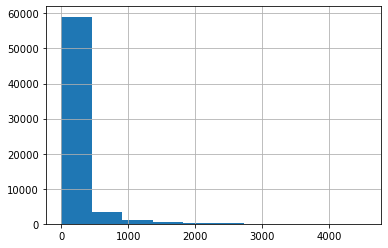

In [42]:
pd.Series(docs_cleaned).str.len().hist()

In [43]:
pd.Series(docs_cleaned).str.len().describe()

count    64249.000000
mean       155.854146
std        321.142423
min          0.000000
25%         17.000000
50%         51.000000
75%        153.000000
max       4544.000000
dtype: float64

> since 75% of the reviews are less than 153 words, set MAX_SEQUENCE_LENGTH to 150

In [44]:
MAX_SEQUENCE_LENGTH = 150

In [45]:
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(docs_cleaned)

In [46]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

In [47]:
# integer encode the documents
docs_encoded = integer_encode_documents(docs_cleaned, tokenizer)

In [48]:
np.array(docs_encoded).shape

/Users/antheayang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(64249,)

In [49]:
docs_padded = pad_sequences(docs_encoded, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
docs_padded

array([[  12,    2,  167, ...,    0,    0,    0],
       [3647,   54,   11, ...,    0,    0,    0],
       [   1,  700, 3881, ...,    0,    0,    0],
       ...,
       [   5,    2,    1, ...,    0,    0,    0],
       [ 108, 1350,    9, ...,    0,    0,    0],
       [ 438,    7,    2, ...,    0,    0,    0]], dtype=int32)

In [50]:
docs_padded.shape

(64249, 150)

In [51]:
vocab_size = int(len(tokenizer.word_index) * 1.3)
print(f"Vocab size is {vocab_size} unique tokens.")

Vocab size is 27757 unique tokens.


In [52]:
data_docs_padded = pd.DataFrame(docs_padded)
data_docs_padded

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,12,2,167,942,72,117,104,540,699,0,...,0,0,0,0,0,0,0,0,0,0
1,3647,54,11,4,5,16,3284,2,1,16,...,0,0,0,0,0,0,0,0,0,0
2,1,700,3881,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,308,69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3593,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64244,7,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64245,298,217,4294,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64246,5,2,1,394,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64247,108,1350,9,85,555,1875,534,1,2466,170,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data_docs_padded = pd.concat([data_docs_padded.reset_index(drop=True),
                              data.reset_index(drop=True)], axis=1, ignore_index=True)

In [54]:
mp = {data_docs_padded.columns[-1]: 'label',
     data_docs_padded.columns[-2]: 'text'}
data_docs_padded.rename(columns=mp, errors="raise", inplace=True)
data_docs_padded.columns[-3:]

Index([149, 'text', 'label'], dtype='object')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(docs_padded, labels, 
                                                    test_size=0.2, random_state=41)
X_train.shape, X_test.shape

((51399, 150), (12850, 150))

#### modeling

In [56]:
model_baseline = LogisticRegression(penalty='l2', solver='saga', random_state=41)
model_baseline = model_baseline.fit(X_train, y_train)

In [57]:
print(f'TRAIN Accuracy: {model_baseline.score(X_train, y_train)}')

TRAIN Accuracy: 0.5905562365026557


In [58]:
print(f'TEST Accuracy: {model_baseline.score(X_test, y_test)}')

TEST Accuracy: 0.5848249027237354


## MLP

In [59]:
EMBEDDING_SIZE = 128

> too many params -> easily overfit

In [60]:
vocab_size

27757

In [63]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=docs_padded.shape[1]))
model.add(Flatten())

# model.add(Dense(256, activation='sigmoid')) 
# model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 128)          3552896   
_________________________________________________________________
flatten_2 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1228864   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,781,825
Trainable params: 4,781,825
Non-trainable params: 0
_________________________________________________________________


In [64]:
BATCH_SIZE = 64

In [67]:
# fit the model
es = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)
# lr_manager = OneCycleLR(num_samples=len(X_train), batch_size=BATCH_SIZE, max_lr=1e-2,
#                         end_percentage=0.1, scale_percentage=None,
#                         maximum_momentum=0.95, minimum_momentum=0.85)
                        
log = model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_split=0.1, 
#                 epochs=50, verbose=1, callbacks=[es, lr_manager])
                epochs=50, verbose=1, callbacks=[es])

Instructions for updating:
Use tf.cast instead.


2022-05-12 20:58:44.562481: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


Train on 46259 samples, validate on 5140 samples
Epoch 1/50
46259/46259 [==============================] - 99s 2ms/step - loss: 0.4528 - acc: 0.7892 - val_loss: 0.4140 - val_acc: 0.8113
Epoch 2/50
46259/46259 [==============================] - 99s 2ms/step - loss: 0.3409 - acc: 0.8503 - val_loss: 0.4728 - val_acc: 0.7621
Epoch 3/50
46259/46259 [==============================] - 104s 2ms/step - loss: 0.2925 - acc: 0.8723 - val_loss: 0.4968 - val_acc: 0.7895
Epoch 4/50
46259/46259 [==============================] - 104s 2ms/step - loss: 0.2753 - acc: 0.8779 - val_loss: 0.5483 - val_acc: 0.7776
Epoch 5/50
46259/46259 [==============================] - 98s 2ms/step - loss: 0.2793 - acc: 0.8742 - val_loss: 0.5378 - val_acc: 0.7638
Epoch 00005: early stopping


In [68]:
# evaluate the model
loss_tr, acc_tr = model.evaluate(X_train, y_train, verbose=1)
print('TRAIN Accuracy: %f' % (acc_tr*100))

51399/51399 [==============================] - 28s 549us/step
TRAIN Accuracy: 85.758477


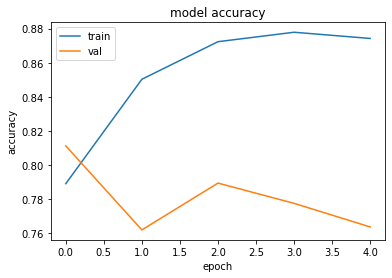

In [72]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [73]:
loss_tt, acc_tt = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (acc_tt*100))

12850/12850 [==============================] - 7s 533us/step
Accuracy: 76.116729
